#Section 1: The Intuition

### SECTION 1.1 The Analogy: Finding Your Way Down a Foggy Mountain
* Imagine you're blindfolded on a hillside at night, and your goal is to reach the lowest point in the valley. You can't see where you are, you can't see the valley, and you have no map.

  All you can do is:

  * Feel the ground under your feet - Is it sloping upward or downward?
  * Take a small step downhill - Move in whichever direction feels like it's going down
  * Repeat - Feel the slope again from your new position, take another step down

* If you keep doing this—always stepping in the direction that goes downward—you'll eventually reach the bottom, even though you never saw the whole landscape.

  **That's gradient descent!**

  * The valley is your error (how wrong your predictions are)
  * Your position on the hill is your current guess for the line's slope and intercept
  * Feeling the ground is calculating the gradient (which direction reduces error)
  * Taking a step is adjusting your guess by a small amount
  * The bottom of the valley is the perfect line that fits your data best

* You start with a terrible guess (maybe you're way up on a hilltop), but by taking many small steps in the right direction, you eventually find the best answer.


### SECTION 1.2 How it Works
* At a high level, the model starts by guessing a straight line to describe the relationship between the input and output data.
* It uses this line to make predictions and checks how far those predictions are from the actual values.
* Based on how wrong the predictions are, the model figures out which direction to adjust the line so the error becomes smaller.
* It then makes a small correction and repeats this process many times.
* After enough iterations, the line settles into a position that best represents the pattern in the data and can be used to make predictions on new inputs.



---



# Section 2: The Math

### 2.1 The Core Formula

#### 1. Hypothesis (Prediction Equation)
$$\hat{y} = \theta_0 + \theta_1 x$$

#### 2. Cost Function (Mean Squared Error)
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$$

#### 3. Gradients (Derivatives)
$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)}$$

#### 4. Update Rules (Gradient Descent)
$$\theta_0 = \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}$$

$$\theta_1 = \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}$$



### 2.2 Math-to-Code Bridge

| Math Symbol | Description | Python Variable |
|-------------|-------------|-----------------|
| $\theta_0$ | Bias (intercept) | `self.bias` |
| $\theta_1, \theta_2, ...$ | Weights | `self.weights` |
| $\alpha$ | Learning rate | `self.lr` |
| $m$ | Number of samples | `m` |
| $n$ | Number of features | `n` |
| $\hat{y}$ | Predicted value | `y_pred` |
| $\frac{\partial J}{\partial \theta_0}$ | Gradient of bias | `db` |
| $\frac{\partial J}{\partial \theta_1}$ | Gradient of weights | `dw` |

---

#Section 3: The Code

###SECTION 3.1- SYNTHETIC DATA GENERATION
Data was generated artificially. This data mimics real world scenarios where we know
the true pattern and can verify that our model learns it correctly.
We're creating fake data instead of loading a real dataset because:
 1. We know the TRUE relationship (y = 2x + 1), so we can verify if our model learns correctly
 2. It's faster and simpler for learning the algorithm
 3. We control the complexity (noise level, number of samples, etc.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#STEP 1- Generating random input features
#np.random.randn(100, 1) geneartes 100 random input values from a standard normal distribution(mean=0, std=1)
X = np.random.randn(100, 1)

#STEP 2-Generating output values (y) using a known linear relationship
#True equation: y= 2X + 1 + noise
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

#Flatten y from shape (100, 1) to (100,) - converts 2D column vector to 1D array
# This matches the expected format for our gradient calculations
y = y.flatten()

# Visualize the generated data-
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data: y = 2x + 1 + noise')
plt.show()

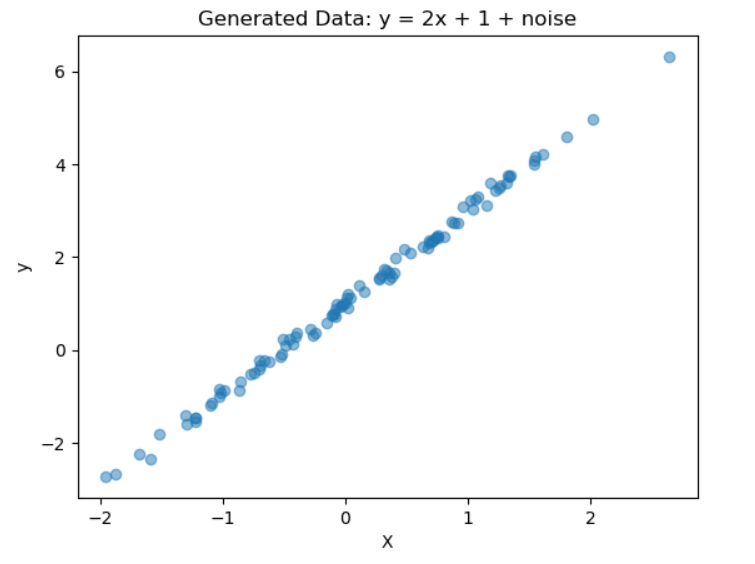

###SECTION 3.2- The Algorithm from Scratch
In this section, Linear Regression was implemented from scratch.
1. No sklearn.LinearRegression - didn't use pre-built .fit() method
2. No scipy.optimize - didn't use automatic optimization functions
3. Pure numpy matrix operations - implemented the mathematical formulas directly
4. Explicit gradient calculations - computed ∂J/∂θ₀ and ∂J/∂θ manually using calculus-derived formulas
5. Hand-coded update loop - wrote the iterative optimization from first principles

This implementation demonstrates understanding of how gradient descent actually works, not just how to use it from a library.


In [ ]:
class LinearRegression:
    '''
    A linear regression model that learns weights and bias using gradient descent.
    Each object is independent and learns from its own training data.
    '''
    def __init__(self,learning_rate=0.01, n_iter=1000):

        # Model parameters - learned during training. Initialised as None.
        self.bias= None
        self.weights= None

        # Hyperparameters - control how learning happens
        self.lr= learning_rate # Controls step size in gradient descent
        self.n_iter= n_iter # Number of training iterations

    def fit(self, X, y):

        '''
        Trains the model using gradient descent to find optimal weights and bias.
        Iteratively adjusts parameters to minimize prediction error.
        '''

        # Extract dataset dimensions: m = number of samples, n = number of features
        m,n=X.shape

        #Initializing parameters with starting guesses (zero is a common choice for linear regression)
        self.bias=0 #Intercept
        self.weights=np.zeros(n) #All weights(one weight per feature)

        # Gradient Descent: Repeat the learning cycle n_iter times
        for i in range(self.n_iter):

            # STEP 1: Make predictions using current parameters
            # Formula: ŷ = θ₀ + X·θ where X·θ is the dot product
            y_pred=self.bias+ np.dot(X, self.weights)

            # STEP 2: Calculate gradients (how much to change each parameter)
            # Gradient tells the direction and magnitude to adjust parameters to reduce error
            db= (1/m)*np.sum(y_pred-y) # ∂J/∂θ₀ (derivative of MSE w.r.t. bias)
            dw= (1/m)*np.dot(X.T,(y_pred-y)) # ∂J/∂θ (derivative of MSE w.r.t. weights)

            # STEP 3: Update parameters by taking a small step opposite to the gradient
            # Moving opposite to gradient reduces error (gradient descent principle)
            self.bias=self.bias-self.lr*db  # Adjust bias
            self.weights=self.weights-self.lr*dw  # Adjust weights

    def predict(self,X):
        '''
        Makes predictions on new data using the learned weights and bias.
        '''
        y_pred=self.bias+np.dot(X,self.weights)
        return y_pred

#Section 3.3: Training and Testing the Model

In [ ]:
#Creating a model instance- (like creating a "student" ready to learn)
model= LinearRegression()

#Training the model on our data - this is where gradient descent runs
model.fit(X, y)

#Using the trained model to make predictions on the same data
y_pred=model.predict(X)

#Displaying the results-
print(f"Predictions:{y_pred}")
print(f"Learned Bias (θ₀): {model.bias:.4f}")
print(f"Learned Weights (θ₁): {model.weights}")
print(f"\nTrue equation: y = 2x + 1")
print(f"Learned equation: y = {model.weights[0]:.4f}x + {model.bias:.4f}")

### 3.3 Dimensionality Analysis
Beore running any matrix operations, we must ensure shapes are compatible. This section verifies that our data dimensions align correctly for gradient descent calculations. Understanding tensor shapes prevents runtime errors and explains why certain operations (like transpose) are mathematically necessary.


**Expected shapes of our synthetic data**-
* Shape of Input $X$: `(100, 1)`
  * 100 Samples(N),1 feature(D)
* Shape of Weights $W$: `(1, )`
  * One weight per feature
* Shape of Output $y$: `(100, )`
  * One prediction per sample (N,)


 **Tensor Operations:** Why does the dot product $X \cdot W$ work here?

The dot product $X \cdot W$ works because of the matrix multiplication rule: the inner dimensions must match.
* For $A \cdot B$ to work: if A is (a, b) and B is (b, c), result is (a, c)
* The two middle numbers (both b) must be equal
* In our code-
  * $X \cdot weights$  =  y_pred

    $(100, 1) \cdot   (1,)$    = (100,)
  * This operation works because:

    * X has 1 column (1 feature)
    * weights has 1 element (1 weight)
    * The "1" matches, so multiplication is valid
    * We get 100 outputs (one prediction per sample)




---

#Section 4: Visualization & Chaos Testing

###4.1 Results Visualization

In [ ]:
# ---FINAL MODEL PERFORMANCE: The best fit line---
# Visualizing how well the learned line fits the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Best Fit Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Comparing true relationship vs what the model learned
# Ideally, learned values should be close to 2.0 and 1.0
print(f"True equation: y = 2x + 1")
print(f"Learned equation: y = {model.weights[0]:.3f}x + {model.bias:.3f}")

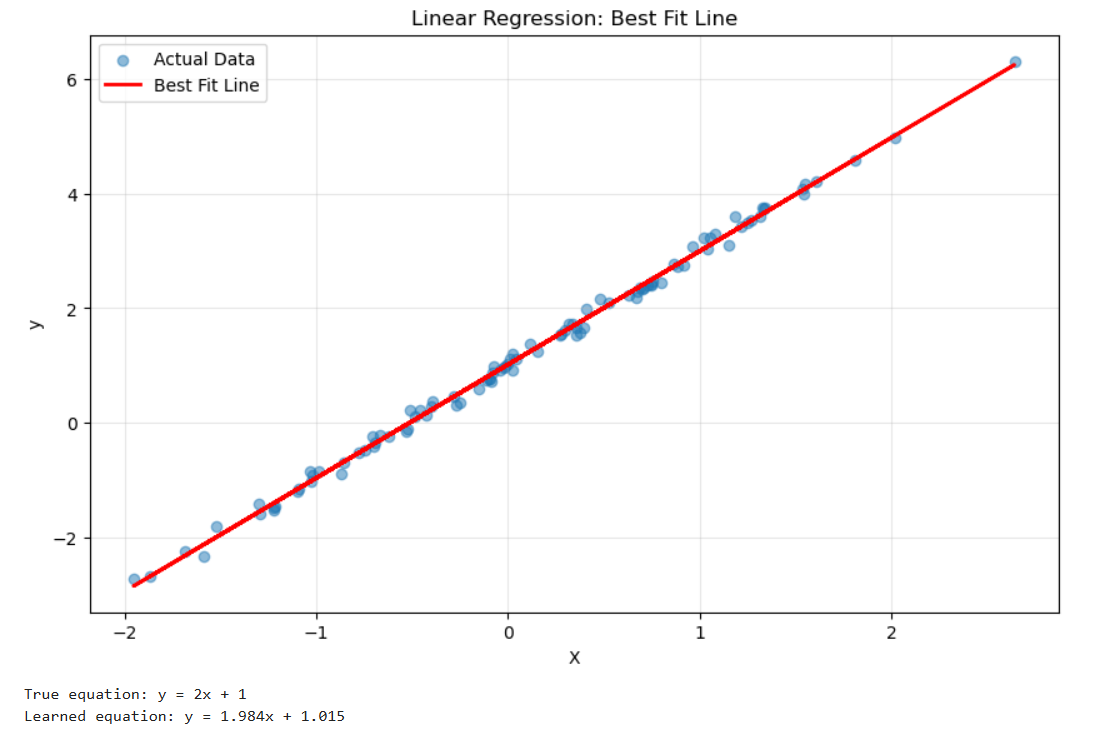

In [ ]:
# ---BEFORE vs AFTER COMPARISON---
#Showing the transformation from initial guess to learned model
#This demonstrates that gradient descent actually improved the fit

#Creating two side-by-side plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT: Before training (random initialization)
axes[0].scatter(X, y, color='blue', alpha=0.6, label='Data')
# Random line (what model would predict with weights=0, bias=0)
random_pred = 0 + 0 * X
axes[0].plot(X, random_pred, color='gray', linewidth=2, label='Initial Guess (θ=0)', linestyle='--')

axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Before Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RIGHT PLOT: After training
#Shows the learned model after 1000 gradient descent iterations
axes[1].scatter(X, y, color='blue', alpha=0.6, label='Data')
axes[1].plot(X, y_pred, color='red', linewidth=2.5, label='Learned Line')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].set_title('After Training (1000 iterations)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

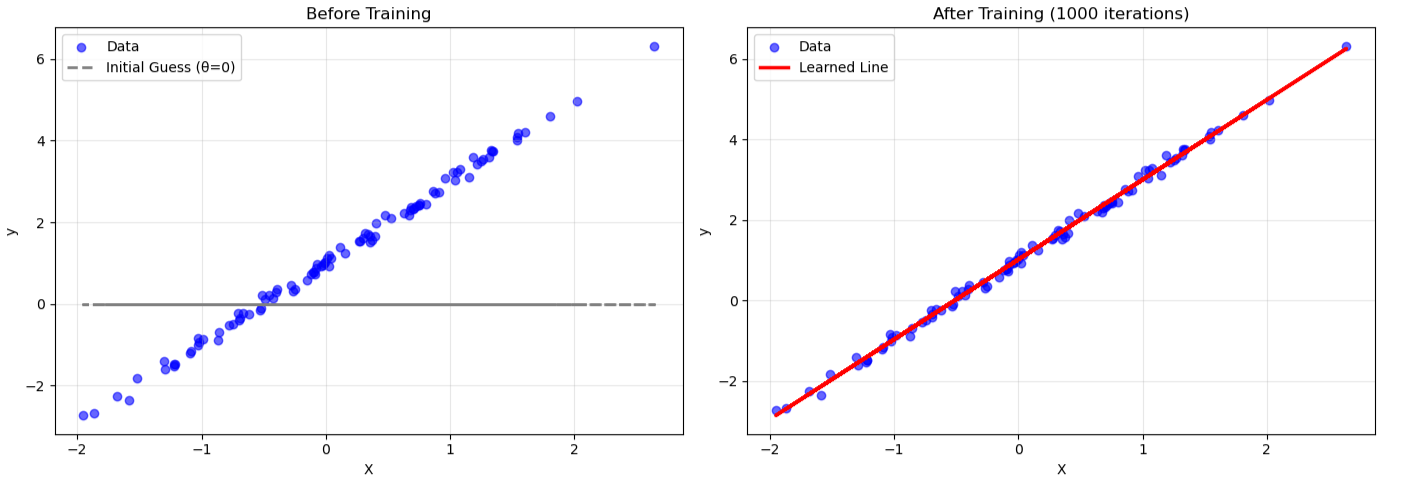

### 4.2 The "What If?" Section (The Chaos Test)
Machine learning is about balance. Too aggressive, and you break the model. Too cautious, and you never reach the solution. The "chaos tests" teach us why default values exist and how to diagnose problems when training goes wrong.

Hyperparameters control how the model learns, not what it learns. To truly understand their impact, we intentionally break the model by setting extreme values. This isn't just experimentation—it's how you develop intuition for debugging real-world failures.

Our hyperparameters:

* Learning Rate (α): Controls step size during gradient descent
* Number of Iterations: How many times we update the parameters
####Experiment 1: Learning Rate Too High
* Hypothesis: If we increase the learning rate from 0.01 to 10.0, the steps will be too large and the model will overshoot the minimum repeatedly.

In [ ]:
# Test with extremely high learning rate
print("CHAOS TEST 1: Learning Rate = 10.0 (100x normal)")

model_chaos1 = LinearRegression(learning_rate=10.0, n_iter=1000)
model_chaos1.fit(X, y)

print(f"Learned Weights: {model_chaos1.weights}")
print(f"Learned Bias: {model_chaos1.bias}")
print(f"\nExpected: weight ≈ 2.0, bias ≈ 1.0")
print(f"Got: weight = {model_chaos1.weights[0]:.2f}, bias = {model_chaos1.bias:.2f}")

CHAOS TEST 1: Learning Rate = 10.0 (100x normal)
Learned Weights: [nan]
Learned Bias: nan

Expected: weight ≈ 2.0, bias ≈ 1.0
Got: weight = nan, bias = nan

* Observation:The weights exploded to NaN (Not a Number) or extremely large values like ±inf.
* Why it broke: Imagine trying to walk down a hill blindfolded by taking 10-meter steps. You'd leap over the valley and crash into the opposite hillside, then bounce back even harder. Mathematically, when gradients are multiplied by a massive learning rate, the parameter updates become so large that they diverge instead of converge.
* Real-world lesson: If your training loss suddenly jumps to infinity or NaN, your learning rate is probably too high.

####Experiment 2: Learning Rate Too Low
* Hypothesis: If we decrease the learning rate to 0.00001, the model will learn too slowly and won't reach the optimal values in 1000 iterations.

In [ ]:
# Test with extremely low learning rate
print("CHAOS TEST 2: Learning Rate = 0.00001 (1000x smaller)")

model_chaos2 = LinearRegression(learning_rate=0.00001, n_iter=1000)
model_chaos2.fit(X, y)

print(f"Learned Weights: {model_chaos2.weights}")
print(f"Learned Bias: {model_chaos2.bias}")
print(f"\nExpected: weight ≈ 2.0, bias ≈ 1.0")
print(f"Got: weight = {model_chaos2.weights[0]:.2f}, bias = {model_chaos2.bias:.2f}")

CHAOS TEST 2: Learning Rate = 0.00001 (1000x smaller)
Learned Weights: [0.03121729]
Learned Bias: 0.004894457111797561

Expected: weight ≈ 2.0, bias ≈ 1.0
Got: weight = 0.03, bias = 0.00

* Observation: The model barely moved from its initial guess. Weights might be around 0.1 or 0.2 instead of 2.0.
* Why it broke: This is like trying to descend a mountain by taking millimeter-sized steps. You're moving in the right direction, but you'll need thousands more steps to reach the bottom. The learning rate is so tiny that 1000 iterations aren't enough to make meaningful progress.
* Real-world lesson: If your training loss barely decreases after many epochs, your learning rate might be too conservative. You'll need either more iterations or a higher learning rate.

####Experiment 3: Too Few Iterations
* Hypothesis: Even with a good learning rate (0.01), if we only train for 10 iterations instead of 1000, the model won't have enough time to converge.

In [ ]:
# Test with very few iterations
print("CHAOS TEST 3: Only 10 Iterations (100x fewer)")

model_chaos3 = LinearRegression(learning_rate=0.01, n_iter=10)
model_chaos3.fit(X, y)

print(f"Learned Weights: {model_chaos3.weights}")
print(f"Learned Bias: {model_chaos3.bias}")
print(f"\nExpected: weight ≈ 2.0, bias ≈ 1.0")
print(f"Got: weight = {model_chaos3.weights[0]:.2f}, bias = {model_chaos3.bias:.2f}")

CHAOS TEST 3: Only 10 Iterations (100x fewer)
Learned Weights: [0.21166388]
Learned Bias: 0.14585775736891776

Expected: weight ≈ 2.0, bias ≈ 1.0
Got: weight = 0.21, bias = 0.15

* Observation: The model improved slightly from its initial guess but is nowhere near the true values. Maybe weight = 0.5 instead of 2.0.
* Why it broke: Gradient descent is an iterative algorithm—it needs repeated refinement. Ten steps aren't enough to navigate from a random starting point to the optimal solution. It's like leaving a cake in the oven for 2 minutes when the recipe calls for 20—you'll get something, but it won't be fully baked.
* Real-world lesson: If your model's performance plateaus below expectations, you might need more training epochs. However, there's a trade-off: too many iterations waste computation and can lead to overfitting.

---

# Section 5: Boundary Conditions

**While linear regression is a powerful and widely used technique, it is not a universal solution.**

Boundary conditions define the practical limits within which linear regression remains a valid and reliable model.
Its effectiveness depends on specific assumptions, such as a linear relationship between variables and relatively low noise in the data. Understanding where these conditions hold and where they break down is essential for selecting the right model and avoiding misleading conclusions.

###When to Use Linear Regression-
1. **Approximately Linear Relationships**: Use when the relationship between   inputs and output is linear or can be made linear through transformation.

    Why it works: The model assumes a linear equation, making it simple, fast, and interpretable.

2. **Continuous Output Variables**: Suitable when predicting real-valued quantities such as price, temperature, or age.

    Why it works: Linear regression naturally outputs continuous values.

3. **Interpretability Is Important**: Ideal when understanding feature impact matters (e.g., medical or business analysis).

    Why it works: Model coefficients directly indicate how changes in inputs affect the output.

4. Small to Medium, Low-Dimensional Data: Works well when the number of features is limited and datasets are not extremely large.

    Why it works: Training is computationally efficient and generalizes well with proper regularization.
###When to Avoid Linear Regression-
1. **Non-Linear Relationships**: Avoid when the true pattern is curved or complex.

    Better alternatives: Polynomial regression, decision trees, neural networks.

2. **Classification Problems**: Not suitable for predicting categories or probabilities.

    Better alternatives: Logistic regression, softmax classifiers, tree-based models.

3. **Outliers or Noisy Data**: Sensitive to extreme values due to MSE loss.

    Better alternatives: Robust regression, outlier handling techniques.

4. **Highly Correlated Features** (Multicollinearity): Leads to unstable and hard-to-interpret coefficients.

    Better alternatives: Ridge/Lasso regression, PCA, feature selection.

5. **High-Dimensional, Unstructured Data**: Ineffective for images, text, or audio.

    Better alternatives: CNNs, Transformers, or other deep learning models.



---



#Section 6: Self-Reflection
By implementing Linear regression from scratch, we were able to move beyond using pre-built libraries and understand how a machine learning works at fundamental level. Through this, one gets to explore not only the mathematical formulation of the model but also the challenges involved in training it using gradient descent.

**This section reflects on the key learnings, difficulties faced, and insights gained throughout the process.**
* **Hardest Part:** Understanding the Gradient Without Computing the Loss.

  * The most confusing part was understanding that calculating the derivates of MSE(Mean Squared Error)  without calculating the MSE explicitly in the code is more optimal.
  * In calculus class, we learn: "First write the function f(x), then find f'(x)." So I assumed the derivative of MSE will also have to be computed this way.
  * However, I realised that direct gradient is more efficient beacuse:
    1. Fewer Operations
    * MSE requires: Computing (y_pred - y)² for all m samples, then summing
    * Gradient requires: Computing (y_pred - y) for all m samples, then summing (no squaring!)
    * Savings: You skip the squaring operation entirely

    * Example with 100 samples:

    MSE: 100 subtractions + 100 multiplications (squaring) + 100 additions (sum) = 300 operations

    Gradient: 100 subtractions + 100 additions (sum) = 200 operations

    You save 100 operations per iteration!

    2. Memory Efficiency

    * You only store the error vector (y_pred - y) once
    * No need to store the squared errors separately
    * In large-scale ML with millions of samples, this memory saving matters

    3. Numerical Stability
    * Squaring magnifies floating-point error
    * The gradient formula uses linear residuals, not squared residuals.
    * Fewer amplified errors and better-conditioned updates
  

In [ ]:
#APPROACH 1- Calculating MSE before the gradient
# Calculating MSE- EXTRA WORK
mse = (1/m) * np.sum((y_pred - y) ** 2)      # O(m) operations

#Calculating gradients
db = (1/m) * np.sum(y_pred - y)              # O(m) operations
dw = (1/m) * np.dot(X.T, (y_pred - y))       # O(m*n) operations

#APPROACH 2- Direct gradient calculation
db = (1/m) * np.sum(y_pred - y)              # O(m) operations
dw = (1/m) * np.dot(X.T, (y_pred - y))       # O(m*n) operations

*   **LLM usage**: Where I Used It and What I Had to Fix. I want to be transparent about where I used AI assistance versus where I coded independently. Here's the honest breakdown:
    * What I Coded Myself (No LLM): ~90% of the core implementation was written by me after understanding the mathematics.
    
      I wrote all the sections by first understanding the algorithm from lectures/notes, then translating the math into code myself.
      1. The LinearRegression class structure - I designed this after understanding how gradient descent works
      2. The fit() method logic - The entire gradient descent loop
      3. The predict() method - Straightforward application of the learned equation
    * What I Used LLM For:
      1. Visualization Code: I used Claude to generate the matplotlib plotting code because:

      * I'm less familiar with matplotlib's syntax and styling options

      * Visualization is about presentation, not algorithmic understanding

      * I wanted professional-looking plots without spending hours on documentation
      2. The Critical Bug Fix: y.flatten() Issue. This was the most important LLM intervention, and it taught me a valuable lesson about dimensionality.

      * What went wrong: The predictions y_pred had shape (100,) (1D array), but my target y had shape (100, 1) (2D column vector). Predictions were repeating or showing weird patterns
      * What the LLM told me-

        Add this after generating y:

        y = y.flatten()

        (Converts (100, 1) → (100,))
    * My philosophy on LLM usage: I treat LLMs like a knowledgeable colleague who's good at syntax.I don't ask the LLM to explain it. I struggle through it myself, then verify my understanding.
* **Key Takeaway**: **The "Eureka!" Moment**
  * If I had to explain this project in an interview tomorrow, my biggest revelation would be:

    **"Gradient Descent Isn't Magic—It's Just Organized Common Sense"**
  * Before this project, machine learning felt like this intimidating black box.
  
    I'd see terms like "optimization," "convergence," and "gradient descent" in lectures and think, "This must be incredibly complex if it powers all of AI"
  * But when I sat down to implement it from scratch without sklearn, something unexpected happened: it was shockingly simple.
  * Here's what gradient descent actually is: The entire "magic" of machine learning in 4 lines!
    1. Guess
    2. Measure how wrong
    3. Adjust in the right direction
    4. Repeat
  * That .fit() method was a black box. I knew it worked, but I had no idea how.
  * But implementing it manually was like taking apart the clock and seeing all the gears. Suddenly, the "magic" disappeared and was replaced with understanding.

In [ ]:
#OLD APPROACH-
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)  # Magic happens here

#NEW APPROACH-
# The entire "magic" of machine learning in 4 lines:
for i in range(iterations):
    prediction = make_guess(X, weights)            # Try your current guess
    error = prediction - actual                    # See how wrong you are
    gradient = calculate_direction(X, error)       # Figure out which way to adjust
    weights = weights - learning_rate * gradient   # Take a small step in that direction